# Chapter 9. A Pythonic Object

**Example 1-2**: two-dimensional vector class 

In [8]:
from math import hypot

class Vector:
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __repr__(self): # get the string representation of the object 
        return 'Vector(%r, %r)' % (self.x, self.y)
    
    def __abs__(self):
        return hypot(self.x, self.y)
    
    def __bool__(self):
        return bool(abs(self))
    
    def __add__(self, other):
        x = self.x + other.y
        y = self.y + other.y
        return Vector(x,y)
    
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

## Obejct Representations

* Python has two standard way of getting a string representation from any object:
    1. repr( )
        * Return a string representing the object as the developer wants to see it 
    2. str( )
        * Return a string representing the obejct as the user wants to see it


## Vector Class Redux

**Example 9-2.** 

In [6]:
from array import array
import math

In [56]:
class Vector2d:
    
    typecode = 'd' #1
    
    def __init__(self,x,y):
        self.x = float(x) #2
        self.y = float(y)
    
    @property  
    def x(self):
        return self.__x
    
    @property
    def y(self):
        return self.__y
   
    def __iter__(self):
        return (i for i in (self.x, self.y)) #3
    
    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r},{!r})'.format(class_name, *self) #4
    
    def __str__(self):
        return str(tuple(self)) #5
    
    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +  #6
                bytes(array(self.typecode, self))) #7

    def __eq__(self,other):
        return tuple(self) == tuple(other)#8
    
    def __abs__(self):
        return math.hypot(self.x, self.y)#9
    
    def __bool__(self):
        return bool(abs(self)) #10
    
    def angle(self):
        return math.atan2(self.y, self.x)
    
    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('p'):
            fmt_spec = fmt_spec[:-1]
            coords = (abs(self), self.angle())
            outer_fmt = '<{},{}>'
        else:
            coords = self
            outer_fmt = '({},{})'
        components = (format(c,fmt_spec)for c in coords)
        return outer_fmt.format(*components)
    
    def __hash__(self):
        return hash(self.x) ^ hash(self.y)
    
    @classmethod 
    def frombytes(cls, octets):
        typecode = chr(octets[0])
        memv = memoryview(cotets[1:]).cast(typecode)
        return cls(*memv)

**Example 9-1.** Vector2d instances have several representations

In [12]:
v1 = Vector2d(3,4)

In [13]:
print(v1.x, v1.y) # The components of a Vector2d can be accessed directly 
# as attributes 

3.0 4.0


In [14]:
x,y = v1 # A Vector2d can be unpacked to tuple of variables. 

In [15]:
x,y

(3.0, 4.0)

In [16]:
v1 #3

Vector2d(3.0,4.0)

In [17]:
v1_clone = eval(repr(v1)) #4

In [18]:
v1 == v1_clone #5

True

In [19]:
print(v1) #6

(3.0, 4.0)


In [21]:
octetes = bytes(v1) #7
octetes

b'd\x00\x00\x00\x00\x00\x00\x08@\x00\x00\x00\x00\x00\x00\x10@'

In [22]:
abs(v1) #8

5.0

In [23]:
bool(v1), bool(Vector2d(0,0)) #9

(True, False)

## An Alternative Constructor 

**Example 9-3.** Part of vector2d_v1.py: this snippest shows only the frombytes class method, added to the Vector2d definition in vector2d_v0.py

In [25]:
@classmethod 

def frombytes(cls, octets):
    typecode = chr(octets[0])
    memv = memoryview(cotets[1:]).cast(typecode)
    return cls(*memv)

**How to use @classmethod**: 

* classmethod changes the way the method is called, so it receives the class itself as the first argument, instead of an instance. 

**Example 9-4.** Comparing behaviors of classmethod and staticmethod

In [26]:
class Demo:
    
    @classmethod
    def klassmeth(*args):
        return args # klassmeth just returns all positional arguments 
    
    @staticmethod
    def statmeth(*args):
        return args # statmeth does the same 

In [27]:
# No matter how you invoke it, Demo.klassmeth receives the Demo class as 
# the first argument. 

Demo.klassmeth()

(__main__.Demo,)

In [28]:
Demo.klassmeth('spam')

(__main__.Demo, 'spam')

In [30]:
Demo.statmeth()

()

In [31]:
Demo.statmeth('spam')

('spam',)

## Formatted Displays

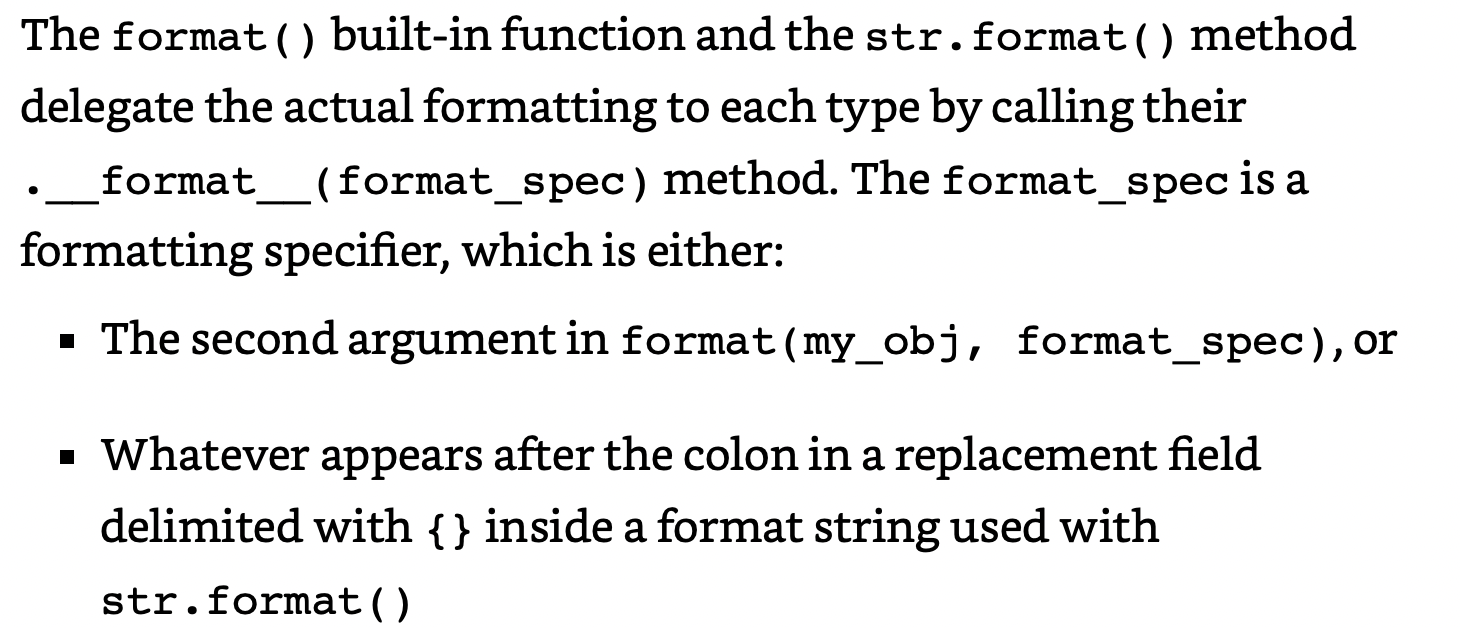

In [32]:
from IPython.display import Image
Image(filename='chapter9image.png')

In [33]:
from datetime import datetime

In [34]:
now = datetime.now()

In [35]:
format(now, '%H:%M:%S')

'10:30:26'

In [36]:
'It is now {:%I:%M %p}'.format(now)

'It is now 10:30 AM'

In [40]:
v1 = Vector2d(3,4)

In [41]:
format(v1)

'(3.0, 4.0)'

In [43]:
format(v1, '.3f')

TypeError: unsupported format string passed to Vector2d.__format__

**Example 9-5.** We will fix this error by implementing format

In [44]:
# inside the Vector2d class

def __format__(self, fmt_spec=''):
    components = (format(c,fmt_spec) for c in self)
    return '({},{})'.format(*components)

## A Hashable Vector2d

In [48]:
v1 = Vector2d(3,4)
hash(v1)

TypeError: unhashable type: 'Vector2d'

* To make a **Vector2d** hashable, we must implement #_hash_#
* An object is **hashable** if it has a hash value which never changes during its lifetime.
* **Hashability** makes an object usable as a dictionary key and a set member, because these data structures use the hash value internally.


**Example 9-7.** vector3d_v3.py: only the changes needed to make Vector2d immutable are shown here. 

In [49]:
class Vector2d:
    typecode = 'd'
    
    def __init__(self, x,y):
        self.__x = float(x) # use exactly two leading underscores to make an attribute private.
        self.__y = float(y)
    
    @property  #the decorator makes the getter method of a property
    def x(self):
        return self.__x
    
    @property
    def y(self):
        return self.__y
    
    def __iter__(self):
        return (i for i in (self.x, self.y))

**Example 9-8.** vector2d_v3.py: implementation of hash

In [50]:
# inside class Vector2d:

def __hash__(self):
    return hash(self.x) ^ hash(self.y)

In [52]:
v1 = Vector2d(3,4)

In [53]:
v2 = Vector2d(3.1,4.2)

In [54]:
hash(v1), hash(v2)

(7, 384307168202284039)

In [55]:
set([v1,v2])

{Vector2d(3.0,4.0), Vector2d(3.1,4.2)}